# Phase III: First ML Proof of Concept (5\%)

### Team Names:
- Sabrina Valerjev
- Logan Lary
- Mark Tran

## Part 1
(3%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data

In [1854]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

Possible ML Ideas:
- How financially successful will a movie be? 
    - Genre (limit to the first in the list), MPAA, Review score (ratings), country 


In [1855]:
dataframe = pd.read_csv("final_merged_movie_data.csv")
print(dataframe.columns)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons', 'Rank', 'Worldwide', 'Domestic', '%', 'Foreign', '%.1',
       'Rating', 'Popularity', 'Keywords', 'Ratings Amount'],
      dtype='object')


In [1856]:
dataframe.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Rank,Worldwide,Domestic,%,Foreign,%.1,Rating,Popularity,Keywords,Ratings Amount
0,Toy Story 3,2010,G,18 Jun 2010,103 min,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,1,"$1,066,969,703","$415,004,880",38.9%,"$651,964,823",61.1%,7.799,30.310,"escape, hostage, college, villain, sequel, bud...",14838.0
1,Alice in Wonderland,2010,PG,05 Mar 2010,108 min,"Adventure, Family, Fantasy",Tim Burton,"Linda Woolverton, Lewis Carroll","Mia Wasikowska, Johnny Depp, Helena Bonham Carter",Nineteen-year-old Alice returns to the magical...,...,2,"$1,025,467,110","$334,191,110",32.6%,"$691,276,000",67.4%,6.638,26.627,"based on novel or book, queen, psychotic, fant...",14108.0
2,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146 min,"Adventure, Family, Fantasy",David Yates,"Steve Kloves, J.K. Rowling","Daniel Radcliffe, Emma Watson, Rupert Grint",Harry Potter is tasked with the dangerous and ...,...,3,"$960,283,305","$295,983,305",30.8%,"$664,300,000",69.2%,7.700,37.477,"witch, friendship, london, england, corruption...",19315.0
3,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,4,"$828,258,695","$292,576,195",35.3%,"$535,682,500",64.7%,8.369,46.201,"rescue, mission, dreams, airplane, paris, fran...",37094.0
4,Shrek Forever After,2010,PG,21 May 2010,93 min,"Animation, Adventure, Comedy",Mike Mitchell,"Josh Klausner, Darren Lemke, William Steig","Mike Myers, Cameron Diaz, Eddie Murphy",Rumpelstiltskin tricks a mid-life crisis burde...,...,5,"$752,600,867","$238,736,787",31.7%,"$513,864,080",68.3%,6.380,37.911,"witch, sequel, ogre",7440.0


In [1857]:
def clean_box_office(df):
    """
    Cleans and processes box office data for analysis.
    
    Args:
        df (DataFrame): A DataFrame with box office data (e.g., 'Domestic', 'Worldwide', 'Foreign', 'Runtime', 'Released', 'Genre').
        
    Returns:
        df (DataFrame): A cleaned DataFrame with:
            - 'Worldwide_millions', 'Domestic_millions', 'Foreign_millions'
            - 'Runtime', 'Release Month', 'Genre', 'Genre Random'
    """

    df = df[df["Domestic"] != "-"]
    df = df.dropna(subset = ["Worldwide", "Domestic", "Foreign"])
    df["Worldwide"] = (
        df["Worldwide"]
        .astype(str)  
        .str.replace("$", "", regex=False)  
        .str.replace(",", "", regex=False)  
        .astype(int)
    )
    # Clean Domestic column
    df["Domestic"] = (
        df["Domestic"]
        .astype(str)  
        .str.replace("$", "", regex=False) 
        .str.replace(",", "", regex=False)  
    
    )
    # Clean Foreign column
    df["Foreign"] = (
        df["Foreign"]
        .astype(str)  
        .str.replace("$", "", regex=False)  
        .str.replace(",", "", regex=False)  
    )
    # Creating new columns because the raw numbers are too large to process
    df["Worldwide_millions"] = pd.to_numeric(df["Worldwide"]) / 1000000
    df["Domestic_millions"] = pd.to_numeric(df["Domestic"]) / 1000000
    df["Foreign_millions"] = pd.to_numeric(df["Foreign"], errors="coerce") / 1000000

    df = df.dropna(subset = ["Runtime"])
    df["Runtime"] = df["Runtime"].str.extract(r'(\d+)').astype(int)
    
    df["Release Month"] = pd.to_datetime(df["Released"], format='%d %b %Y').dt.month
    
    df["Genre"] = df["Genre"].apply(lambda x: [genre.strip() for genre in str(x).split(",") if genre.strip()])
    df["Genre Random"] = df["Genre"].apply(lambda x: np.random.choice(x) if isinstance(x, list) else x)
   
    return df

In [1858]:
df_clean = clean_box_office(dataframe)

In [1859]:
# only will run once
df_clean = df_clean.drop(["Type", "Poster", "DVD", "totalSeasons", "Error", \
                            "Response", "Website", "Rank", "Production", "Ratings", \
                            "imdbRating", "imdbVotes", "%", "%.1", "Popularity", "Ratings Amount",\
                            "Worldwide", "Domestic", "Foreign"], axis=1)

In [1860]:
print(df_clean.columns)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Metascore', 'imdbID', 'BoxOffice', 'Rating', 'Keywords',
       'Worldwide_millions', 'Domestic_millions', 'Foreign_millions',
       'Release Month', 'Genre Random'],
      dtype='object')


In [1861]:
df_clean.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbID,BoxOffice,Rating,Keywords,Worldwide_millions,Domestic_millions,Foreign_millions,Release Month,Genre Random
0,Toy Story 3,2010,G,18 Jun 2010,103,"[Animation, Adventure, Comedy]",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,92.0,tt0435761,"$415,004,880",7.799,"escape, hostage, college, villain, sequel, bud...",1066.969703,415.004880,651.964823,6,Comedy
1,Alice in Wonderland,2010,PG,05 Mar 2010,108,"[Adventure, Family, Fantasy]",Tim Burton,"Linda Woolverton, Lewis Carroll","Mia Wasikowska, Johnny Depp, Helena Bonham Carter",Nineteen-year-old Alice returns to the magical...,...,53.0,tt1014759,"$334,191,110",6.638,"based on novel or book, queen, psychotic, fant...",1025.467110,334.191110,691.276000,3,Adventure
2,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146,"[Adventure, Family, Fantasy]",David Yates,"Steve Kloves, J.K. Rowling","Daniel Radcliffe, Emma Watson, Rupert Grint",Harry Potter is tasked with the dangerous and ...,...,65.0,tt0926084,"$296,374,621",7.700,"witch, friendship, london, england, corruption...",960.283305,295.983305,664.300000,11,Fantasy
3,Inception,2010,PG-13,16 Jul 2010,148,"[Action, Adventure, Sci-Fi]",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,74.0,tt1375666,"$292,587,330",8.369,"rescue, mission, dreams, airplane, paris, fran...",828.258695,292.576195,535.682500,7,Adventure
4,Shrek Forever After,2010,PG,21 May 2010,93,"[Animation, Adventure, Comedy]",Mike Mitchell,"Josh Klausner, Darren Lemke, William Steig","Mike Myers, Cameron Diaz, Eddie Murphy",Rumpelstiltskin tricks a mid-life crisis burde...,...,58.0,tt0892791,"$238,736,787",6.380,"witch, sequel, ogre",752.600867,238.736787,513.864080,5,Animation


In [1862]:
# bias column
def add_bias_column(X):
    """ 
        Adds a bias column
    """

    if len(np.array(X).shape) == 1:
        X = np.array(X).reshape(-1, 1)
    bias = np.ones((X.shape[0], 1))
    
    return np.hstack([bias, X])

In [1863]:
def preprocess(df):
    """
    Preprocesses the input DataFrame by encoding categorical variables and extracting features and target.

    Args:
        df (DataFrame): A pandas DataFrame containing columns like 'Runtime', 'overall_rating', 'Genre Random', 'MPAA', 
                        'Country', and 'Worldwide_millions' to be processed for machine learning.

    Returns:
        X (array): A 2D numpy array containing the feature values for model training.
        y (array): A 1D numpy array containing the target values ('Worldwide_millions').
    """

    drop_cols = ['Title', 'Released', 'Genre', 'Poster', 'DVD', 'Type', 
                 'Production', 'Website', 'Response', 'Error', 'Year', 'Metascore',
                 'Foreign_millions', 'Domestic_millions']
    df = df.drop(columns=[col for col in df.columns if col in drop_cols], errors='ignore')
    df = df.dropna(subset=["Runtime", "Country", "Rated", "Rating", "Worldwide_millions"])

    cat_cols = []
    for col in ["Genre Random", "Country", "Rated"]:
        if col in df.columns:
            cat_cols.append(col)
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    target = "Worldwide_millions"
    # Drop object columns that weren't converted to dummies
    object_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and col != target:
            object_cols.append(col)
    
    if object_cols:
        print(f"Dropping object columns: {object_cols}")
        df = df.drop(columns=object_cols)
    
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in dataframe.")
    
    feature_cols = [col for col in df.columns if col != target]
    
    # Ensure df has only numeric columns before creating X and y
    print("DataFrame dtypes after preprocessing:")
    print(df.dtypes)
    
    # Create X & y AFTERall preprocessing is done
    X = df[feature_cols].values
    y = df[target].values
    
    # Convert X to float64 which supports np.isnan
    X = X.astype(np.float64)
    
    # Handle NaN values using imputation
    if np.isnan(X).any():
        print("Warning: X contains NaN values. Imputing with mean...")
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)
    
    print("Feature matrix shape:", X.shape)
    print("Feature names:", feature_cols)
    print("Target vector shape:", y.shape)
    
    return X, y, df

In [1864]:
from sklearn.linear_model import LinearRegression

def line_of_best_fit(X, y):
    """
    Returns slope and intercept of a line of best fit.
    
    Args:
        X (array): can be either 1-d or 2-d
        y (array): a 1-d array including all corresponding response values to X
        
    Returns:
        vector (array): vector containing the coefficients for line of best fit; first term is intercept, the second is slope
    """

    X_with_bias = add_bias_column(X)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_with_bias, y)
    
    # Return coefficients as a numpy array
    return model.coef_

In [1865]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def linreg_predict(Xnew, ynew, m):
    """
    Args:
        Xnew (array): either a 1-d or 2-d array
        ynew (array): 1-d array 
        m (array): 1-d array contains coefficients from the line_of_best_fit function

    Returns:
        dct (dictionary): contains four key-value pairs
            - ypreds: predicted values from applying m to Xnew
            - resids: the residuals, the differences between ynew and ypreds
            - mse: mean squared error
            - r2: coefficient of determination
    """
    x = add_bias_column(Xnew)
    
    # Ensure m has the right shape
    if len(m) != x.shape[1]:
        raise ValueError(f"Coefficient vector shape {m.shape} doesn't match input shape {x.shape}. "
                         f"Expected coefficient length: {x.shape[1]}")
    
    ypreds = x.dot(m)
    resids = ynew - ypreds
    mse = mean_squared_error(ynew, ypreds)
    r2 = r2_score(ynew, ypreds)
    
    dct = {
        'ypreds': ypreds,
        'resids': resids,
        'mse': mse,
        'r2': r2
    }
    return dct

In [1866]:
def evaluate_reg_model(X, y):
    print(f"Data shapes before splitting - X: {X.shape}, y: {y.shape}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    print(f"Training data shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Test data shapes - X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    coefficients = line_of_best_fit(X_train, y_train)
    print("Coefficients shape:", coefficients.shape)
    
    results = linreg_predict(X_test, y_test, coefficients)
    print("Linear Regression Model MSE:", results['mse'])
    print("Linear Regression Model R^2:", results['r2'])
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, results['ypreds'], alpha=0.7)
    plt.xlabel("Actual Worldwide Box Office (millions)")
    plt.ylabel("Predicted Worldwide Box Office (millions)")
    plt.xlim(0, 2200)
    plt.ylim(0, 1400)
    plt.title("Actual v. Predicted Box Office in Linear Regression Model")
    
    min_val = min(y_test.min(), results['ypreds'].min())
    max_val = max(y_test.max(), results['ypreds'].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--')
    plt.show()
    return results

In [1867]:
# df_clean.columns


Dropping object columns: ['Director', 'Writer', 'Actors', 'Plot', 'Language', 'Awards', 'imdbID', 'BoxOffice', 'Keywords']
DataFrame dtypes after preprocessing:
Runtime                     int64
Rating                    float64
Worldwide_millions        float64
Release Month               int32
Genre Random_Adventure       bool
                           ...   
Rated_PG                     bool
Rated_PG-13                  bool
Rated_R                      bool
Rated_TV-MA                  bool
Rated_TV-PG                  bool
Length: 360, dtype: object
Feature matrix shape: (1247, 359)
Feature names: ['Runtime', 'Rating', 'Release Month', 'Genre Random_Adventure', 'Genre Random_Animation', 'Genre Random_Biography', 'Genre Random_Comedy', 'Genre Random_Crime', 'Genre Random_Documentary', 'Genre Random_Drama', 'Genre Random_Family', 'Genre Random_Fantasy', 'Genre Random_History', 'Genre Random_Horror', 'Genre Random_Music', 'Genre Random_Musical', 'Genre Random_Mystery', 'Genre Random

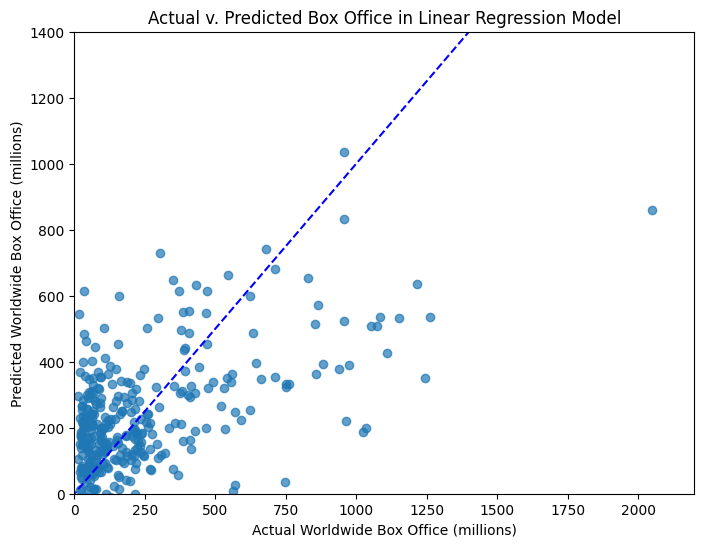

In [1868]:
def main():
    try:
        X, y, df = preprocess(df_clean)
    except ValueError as e:
        print("Preprocessing error: ", e)
        return

    evaluate_reg_model(X, y)

if __name__ == '__main__':
    main()


Dropping object columns: ['Director', 'Writer', 'Actors', 'Plot', 'Language', 'Awards', 'imdbID', 'BoxOffice', 'Keywords']
DataFrame dtypes after preprocessing:
Runtime                     int64
Rating                    float64
Worldwide_millions        float64
Release Month               int32
Genre Random_Adventure       bool
                           ...   
Rated_PG                     bool
Rated_PG-13                  bool
Rated_R                      bool
Rated_TV-MA                  bool
Rated_TV-PG                  bool
Length: 360, dtype: object
Feature matrix shape: (1247, 359)
Feature names: ['Runtime', 'Rating', 'Release Month', 'Genre Random_Adventure', 'Genre Random_Animation', 'Genre Random_Biography', 'Genre Random_Comedy', 'Genre Random_Crime', 'Genre Random_Documentary', 'Genre Random_Drama', 'Genre Random_Family', 'Genre Random_Fantasy', 'Genre Random_History', 'Genre Random_Horror', 'Genre Random_Music', 'Genre Random_Musical', 'Genre Random_Mystery', 'Genre Random

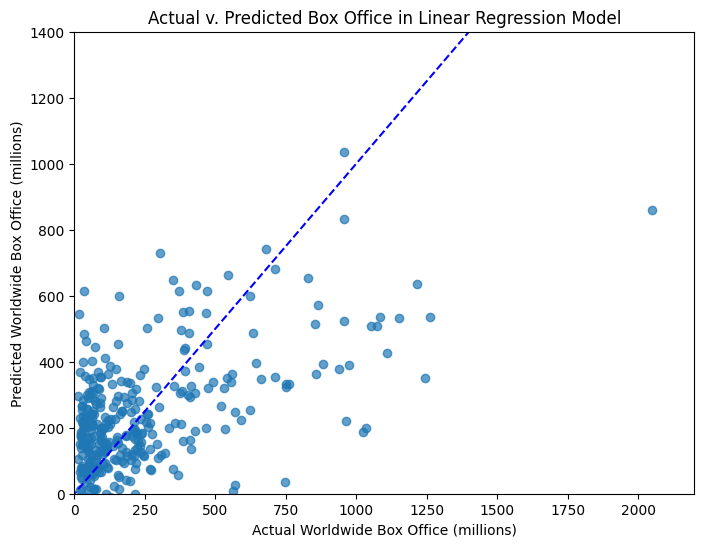

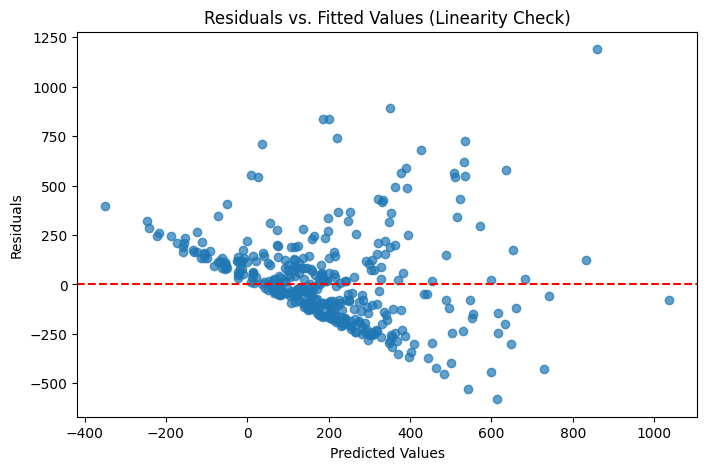

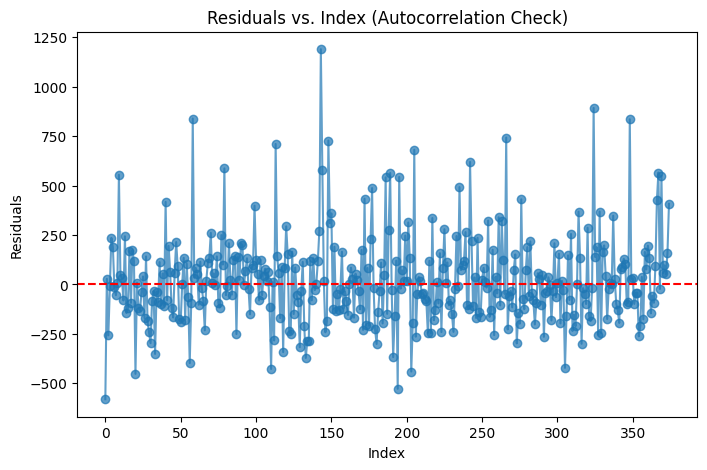

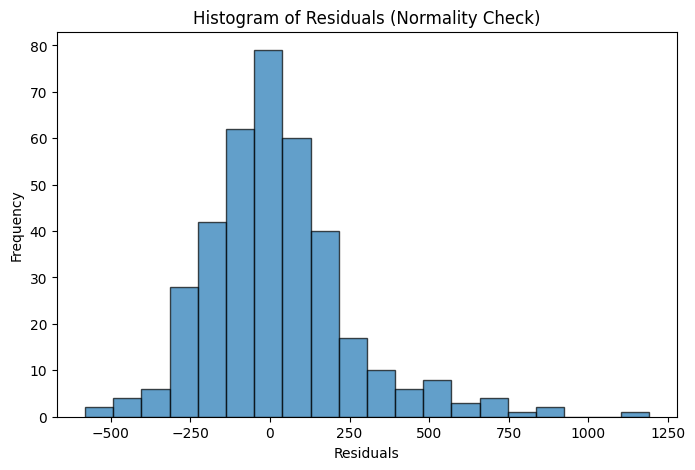

In [1869]:
import matplotlib.pyplot as plt
import numpy as np

X, y, df = preprocess(df_clean)

regression_results = evaluate_reg_model(X, y)

def check_assumptions(results):
    # Extract residuals and predicted values
    resids = results['resids']
    ypreds = results['ypreds']
    
    # 1. Linearity Check - Residuals vs. Fitted Values
    plt.figure(figsize=(8, 5))
    plt.scatter(ypreds, resids, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--') 
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Fitted Values (Linearity Check)")
    plt.show()
    
    # 2. Autocorrelation Check - Residuals vs. Index of X
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(resids)), resids, marker='o', linestyle='-', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--') 
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Index (Autocorrelation Check)")
    plt.show()
    
    # 3. Normality Check - Histogram of Residuals
    plt.figure(figsize=(8, 5))
    plt.hist(resids, bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram of Residuals (Normality Check)")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

# Call the assumption checking function with the regression results
check_assumptions(regression_results)


## Part 2
(2%) A discussion of the preliminary results:
   - This may include checking of assumptions, generated plots/tables, measures of fit, or other attributes of the analysis
   - It does not have to be fully correct, but as a proof of concept must demonstrate that the group is close to completing the analysis

Ethical discussion:

- There could potentially be some representational bias due to the fact that the data collected may be only including the most popular movies from major studios, while more indie movies would not be included (even if it was successful). This could potentially skew the data towards more dominant groups and limit the visibility of other diverse film/film makers.
- Additionally, there could be allocative bias in our data since most of the movies we have scrapped seemed to be in the action genre. This in turn could make our ML biased towards action movies and underestimate the success potential of other movies genres such as horror.
- The last ethical concern that comes to mind is that there could be some potential bias in our data cleaning process. For example, some movies have more than one genre, however we are only interested in the first genre in the list. This can in turn underrepresent some genres within our ML

To begin our discussion of preliminary results, we would like to note that our model is not our final product and that it is still a work in progress. In our first iteration of the model, the model was nearly perfect with a $R^2$ of 0.99. We are aware that this is not due to our creation of a perfect model but because of an error in the code. We are working towards creating a model that is reasonably accurate. The model that we are submitting now is less accurate because we removed one of our features but it still not to the level that we want to deliver during our final presentation. Additionally, the MSE and $R^2$ values for our existing model are extremely unusual for a machine learning model. We contribute these problems to the challenges of creating our model, and we will have these fixed by the final deadline.

Checking of assumptions:

- Because our model is not perfect our checking of assumptions are not going to reflect the final product.
- That being said, the linearity check and exogeneity assumptions fail because the residuals vs. fitted values graph has a clear pattern that shows that as the values increase, the residuals decrease. This suggests that the graph is heavily overestimating values.
- The autocorrelation test passes because there are no patterns. This means that our features are not likely to significantly influence each other
- The normality assuption passes because it looks like the distribution is a normal distribution with most values at or near 0.

## Part 3: Polynomial Regression
Can we predict worldwide box office sales based on the time that a movie was released?

In [1870]:
# first, we need to prepare the data
# every movie has a date of release
# we need to create a new column with the date represented as the number day of the year it is
# ex: 1/1/2023 == 1, 1/2/2023 = 2
df_clean["Date_parsed"] = pd.to_datetime(df_clean["Released"], format = "%d %b %Y") 
df_clean["Day_of_Year"] = df_clean["Date_parsed"].dt.dayofyear
df_clean.head() # printing to verify correct handling 

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,BoxOffice,Rating,Keywords,Worldwide_millions,Domestic_millions,Foreign_millions,Release Month,Genre Random,Date_parsed,Day_of_Year
0,Toy Story 3,2010,G,18 Jun 2010,103,"[Animation, Adventure, Comedy]",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,"$415,004,880",7.799,"escape, hostage, college, villain, sequel, bud...",1066.969703,415.004880,651.964823,6,Comedy,2010-06-18,169
1,Alice in Wonderland,2010,PG,05 Mar 2010,108,"[Adventure, Family, Fantasy]",Tim Burton,"Linda Woolverton, Lewis Carroll","Mia Wasikowska, Johnny Depp, Helena Bonham Carter",Nineteen-year-old Alice returns to the magical...,...,"$334,191,110",6.638,"based on novel or book, queen, psychotic, fant...",1025.467110,334.191110,691.276000,3,Adventure,2010-03-05,64
2,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146,"[Adventure, Family, Fantasy]",David Yates,"Steve Kloves, J.K. Rowling","Daniel Radcliffe, Emma Watson, Rupert Grint",Harry Potter is tasked with the dangerous and ...,...,"$296,374,621",7.700,"witch, friendship, london, england, corruption...",960.283305,295.983305,664.300000,11,Fantasy,2010-11-19,323
3,Inception,2010,PG-13,16 Jul 2010,148,"[Action, Adventure, Sci-Fi]",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,"$292,587,330",8.369,"rescue, mission, dreams, airplane, paris, fran...",828.258695,292.576195,535.682500,7,Adventure,2010-07-16,197
4,Shrek Forever After,2010,PG,21 May 2010,93,"[Animation, Adventure, Comedy]",Mike Mitchell,"Josh Klausner, Darren Lemke, William Steig","Mike Myers, Cameron Diaz, Eddie Murphy",Rumpelstiltskin tricks a mid-life crisis burde...,...,"$238,736,787",6.380,"witch, sequel, ogre",752.600867,238.736787,513.864080,5,Animation,2010-05-21,141


In [1871]:
# now we have to extract the features that we want to use in the model and create the function
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def polynomial_regression(degree, dataframe, print_graph, print_values):
    """
    Creates a polynomial regression model using day of the year to determine worldwide millions.

    Inputs:
        degree (int): number degree of the polynomial fit
        dataframe (df): data frame with features
        print_graph (boolean): indicates if the function should print a graph
        print_value (boolean): indivate if the function should print metric values

    Returns:
        list: list where the first element is r^2 and the second is MSE
        dataframe: the original dataframe
    """
    X = dataframe[["Day_of_Year"]]
    y = dataframe[["Worldwide_millions"]]
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    dataframe["Revenue_prediction"] = model.predict(X_poly)
   
    mse = mean_squared_error(y, dataframe["Revenue_prediction"])
    r2 = r2_score(y, dataframe["Revenue_prediction"])

    if print_values == True:
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R-squared (R²): {r2:.4f}")

    if print_graph == True:
        # sorting by day of year
        df_sorted = dataframe.sort_values("Day_of_Year")

        plt.scatter(df_sorted["Day_of_Year"], df_sorted["Worldwide_millions"], label = "Actual Revenue", alpha=0.6)
        plt.plot(df_sorted["Day_of_Year"], df_sorted["Revenue_prediction"], label ="Prediction (Polynomial Fit)", linewidth=2, color = "red")
        plt.xlabel("Day of Year")
        plt.ylabel("Worldwide Revenue (in Millions)")
        plt.title(f"Polynomial Regression Fit, Degree = {degree}")
        plt.legend()
        plt.show()

    return [r2, mse], dataframe


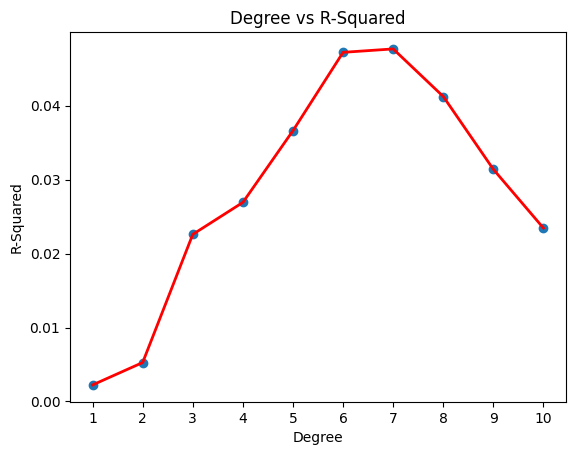

In [1872]:
# One thing to note is that with polynomial models, you can experiment with the degree that you use to find the best fit.
# We ran the polynomial_regression function with different degrees and plotted them to find the best degree 
# to use in our analysis. 

# We determined the best degree by comparing MSE and r-squared at different degrees. 

degree = 1
r2_values = []
mse_values = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
while degree < 11:
    results, df = polynomial_regression(degree, df_clean, False, False)
    r2 = results[0]
    mse = results[1]
    r2_values.append(r2)
    mse_values.append(mse)
    degree += 1

plt.scatter(degrees, r2_values, label = "R2")
plt.plot(degrees, r2_values, label = "R-Squared Line of Best Fit", linewidth=2, color = "red")
plt.title(label = "Degree vs R-Squared")
plt.xlabel("Degree")
plt.ylabel("R-Squared")
plt.xticks(degrees)
plt.show()

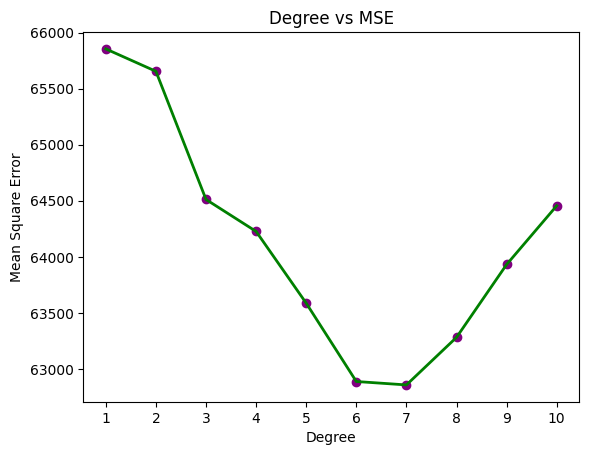

In [1873]:
plt.scatter(degrees, mse_values, label = "MSE", color = "purple")
plt.plot(degrees, mse_values, label = "MSE Line of Best Fit", linewidth=2, color = "green")
plt.title(label = "Degree vs MSE")
plt.xlabel("Degree")
plt.ylabel("Mean Square Error")
plt.xticks(degrees)
plt.show()

To determine the degree that would result in the most accurate predictions, we needed to identify the degree with the $R^2$ closest to 1 and the lowest MSE. Using these criteria, we determined that degree = 6 is the most accurate degree to use with our polynomial model. 

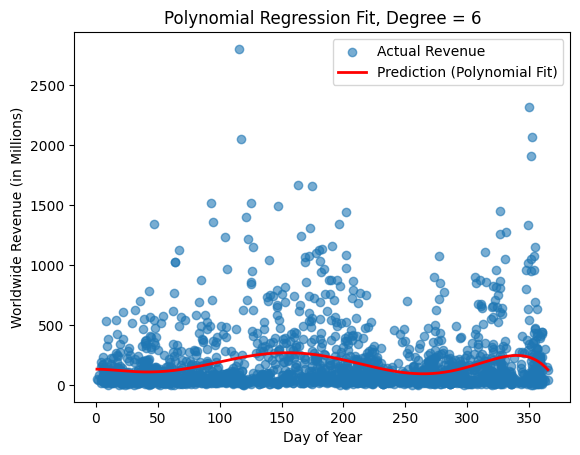

([0.04720783672288509, 62887.11725750065],
                                              Title  Year  Rated     Released  \
 0                                      Toy Story 3  2010      G  18 Jun 2010   
 1                              Alice in Wonderland  2010     PG  05 Mar 2010   
 2     Harry Potter and the Deathly Hallows: Part 1  2010  PG-13  19 Nov 2010   
 3                                        Inception  2010  PG-13  16 Jul 2010   
 4                              Shrek Forever After  2010     PG  21 May 2010   
 ...                                            ...   ...    ...          ...   
 2684                             The Crime Is Mine  2023    NaN  08 Mar 2023   
 2685                           The Taste of Things  2023  PG-13  09 Feb 2024   
 2687                                     Freelance  2023      R  27 Oct 2023   
 2690                                  The Peasants  2023      R  13 Oct 2023   
 2691                                      Kandahar  2023      R  

In [1874]:
# at this point, we can use the polynomial regression model at the 6th degree
polynomial_regression(6, df_clean, True, False)

Looking at this graph, we are concerned that the high volume of movies with low revenue are impacting the accuracy of the model. To see if removing some of the low grossing movies improves accuracy, we filtered our original dataframe.

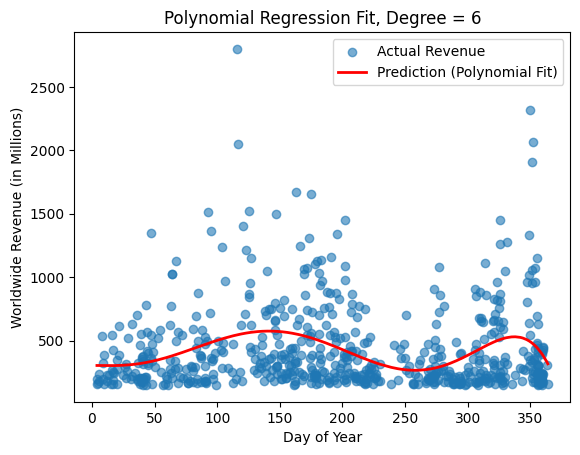

([0.07850566704574335, 103595.37820020116],
                                              Title  Year  Rated     Released  \
 0                                      Toy Story 3  2010      G  18 Jun 2010   
 1                              Alice in Wonderland  2010     PG  05 Mar 2010   
 2     Harry Potter and the Deathly Hallows: Part 1  2010  PG-13  19 Nov 2010   
 3                                        Inception  2010  PG-13  16 Jul 2010   
 4                              Shrek Forever After  2010     PG  21 May 2010   
 ...                                            ...   ...    ...          ...   
 2540                               The Equalizer 3  2023      R  01 Sep 2023   
 2542                       Insidious: The Red Door  2023  PG-13  07 Jul 2023   
 2543   Teenage Mutant Ninja Turtles: Mutant Mayhem  2023     PG  02 Aug 2023   
 2544                                     Scream VI  2023      R  10 Mar 2023   
 2547                    Killers of the Flower Moon  2023      R 

In [1875]:
df_filter = df_clean.copy()
df_filter = df_filter[df_filter["Worldwide_millions"] > 150]
polynomial_regression(6, df_filter, True, False)

The $R^2$ increased by approximately 0.04, which shown an improvement but not a major one. 

Shape of new dataframe: (161, 26).
Mean Squared Error (MSE): 95994.94
R-squared (R²): 0.1273


/var/folders/4d/f0wpx_050hq8tlg8x_1ly7r40000gp/T/ipykernel_70766/2538087820.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



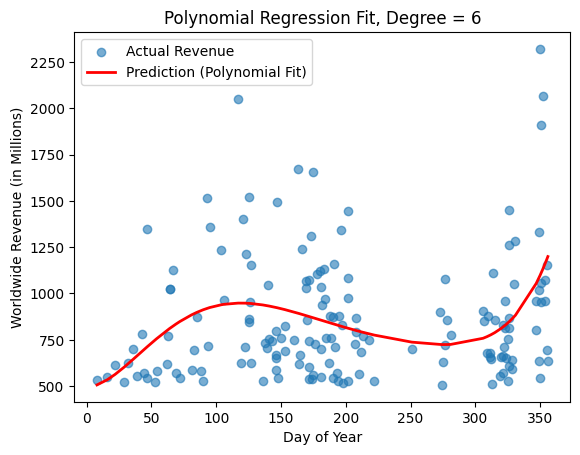

In [1876]:
# How can we improve our r-squared? Remove outliers

# Filter out outliers
df_no_outliers = df_filter[(df_filter['Worldwide_millions'] >= 500) & (df_filter['Worldwide_millions'] <= 2500)]


print(f"Shape of new dataframe: {df_no_outliers.shape}.")
results, df_pred = polynomial_regression(6, df_no_outliers, True, True)

This improved accuracy but still not significantly. We then tried to add new features.

In [1877]:
import plotly.graph_objects as go
def polynomial_regression_genre_and_rated(degree, dataframe, genre_filter, rating_filter, print_graph, print_values, interactive_plot):
    '''
    Creates a polynomial regression model using features of day, genre, and MPAA rating to predict worldwide revenue.

    Inputs:
        - degree (int): polynomial degree to use in the model
        - dataframe (df): dataframe containing all data
        - genre_filter (str): either a string genre name or None, represents genre to filter/predict by
        - rating_filter (str): either a string MPAA rating or None, represents rating to filter/predict by
        - print_graph (boolean): determine if a graph is printed
        - print_values (boolean): determine if metric values are printed
        - interactive_plot (boolean): determine if a interactive px.scatter plot is printed
    
    Returns:
        - list: a list of metric values, the first is r2 and the second is mse
        - df: the original dataframe
        - model: the trained model
        - poly: polynomial features
        - X.columns: used columns
    '''
    df = dataframe.copy()

    # Apply genre and rating filters
    if genre_filter:
        df = df[df["Genre Random"] == genre_filter]
    if rating_filter:
        df = df[df["Rated"] == rating_filter]
    if df.empty:
        print("No data matches the specified Genre and Rating.")
        return [None, None], df

    # dummy encoding categorical values
    df = pd.get_dummies(df, columns=["Genre Random", "Rated"], prefix=["Genre", "Rated"])

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    day_poly = poly.fit_transform(df[["Day_of_Year"]])
    day_poly_df = pd.DataFrame(day_poly, columns=[f'day_poly_{i}' for i in range(day_poly.shape[1])])
    day_poly_df.index = df.index

    # get encoded values
    genre_cols = [col for col in df.columns if col.startswith("Genre_")]
    rated_cols = [col for col in df.columns if col.startswith("Rated_")]

    # aggregating everything
    X = pd.concat([day_poly_df, df[genre_cols], df[rated_cols]], axis=1)
    y = df[["Worldwide_millions"]]

    model = LinearRegression()
    model.fit(X, y)
    df["Revenue_prediction"] = model.predict(X)

    mse = mean_squared_error(y, df["Revenue_prediction"])
    r2 = r2_score(y, df["Revenue_prediction"])

    if print_values:
        print(f"Genre: {genre_filter}, Rating: {rating_filter}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R-squared (R²): {r2:.4f}")

    if print_graph:
        df_sorted = df.sort_values("Day_of_Year")
        plt.scatter(df_sorted["Day_of_Year"], df_sorted["Worldwide_millions"], label="Actual Revenue", alpha=0.6)
        plt.xlabel("Day of Year")
        plt.ylabel("Worldwide Revenue (in Millions)")
        plt.title(f"Polynomial Regression - {genre_filter} | {rating_filter}, Degree = {degree}")

        # making it a smooth line
        day_range = pd.DataFrame({'Day_of_Year': np.linspace(1, 365, 500)})
        day_poly = poly.fit_transform(day_range[["Day_of_Year"]])
        day_poly_df = pd.DataFrame(day_poly, columns=[f'day_poly_{i}' for i in range(day_poly.shape[1])])
        day_poly_df.index = day_range.index

        genre_means = df[genre_cols].mean().to_frame().T
        rated_means = df[rated_cols].mean().to_frame().T
        repeated_genre = pd.concat([genre_means] * len(day_range), ignore_index=True)
        repeated_rated = pd.concat([rated_means] * len(day_range), ignore_index=True)

        X_smooth = pd.concat([day_poly_df, repeated_genre, repeated_rated], axis=1)
        smooth_predictions = model.predict(X_smooth)

        plt.plot(day_range["Day_of_Year"], smooth_predictions, color="red", linewidth=2, label="Smoothed Prediction")
        plt.legend()
        plt.show()

    if interactive_plot:
        df["hover_info"] = (
            "Title: " + df["Title"].astype(str) +
            "<br>Genre: " + dataframe.loc[df.index, "Genre Random"].astype(str) +
            "<br>Rated: " + dataframe.loc[df.index, "Rated"].astype(str) +
            "<br>Actual: $" + df["Worldwide_millions"].round(2).astype(str) + "M" +
            "<br>Predicted: $" + df["Revenue_prediction"].round(2).astype(str) + "M"
        )

        # Interactive scatter plot
        fig = px.scatter(
            df,
            x = "Worldwide_millions",
            y = "Revenue_prediction",
            hover_data=["hover_info"],
            labels={
                "Worldwide_millions": "Actual Revenue (Millions)",
                "Revenue_prediction": "Predicted Revenue (Millions)"
            },
            title="Actual vs Predicted Revenue (Hover for Details)"
        )

        min_val = min(df["Worldwide_millions"].min(), df["Revenue_prediction"].min())
        max_val = max(df["Worldwide_millions"].max(), df["Revenue_prediction"].max())
        fig.add_trace(go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode='lines',
            name='Perfect Prediction',
            line=dict(color='red', dash='dash')
        ))

        fig.update_traces(marker=dict(size=8, opacity=0.7))
        fig.show()

    return [r2, mse], df, model, poly, X.columns


Genre: Adventure, Rating: R
Mean Squared Error (MSE): 8337.53
R-squared (R²): 0.2015


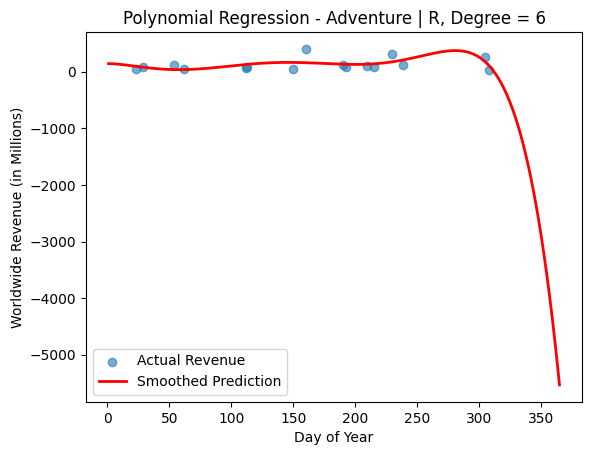

([0.2015107418008305, 8337.529497266769],
                                                   Title  Year     Released  \
 51                                            Predators  2010  09 Jul 2010   
 71                                     Edge of Darkness  2010  29 Jan 2010   
 323                     A Very Harold & Kumar Christmas  2011  04 Nov 2011   
 400                                          Prometheus  2012  08 Jun 2012   
 406                                   The Expendables 2  2012  17 Aug 2012   
 897                                                Chef  2014  30 May 2014   
 1033                                           Vacation  2015  29 Jul 2015   
 1104                                          Mortdecai  2015  23 Jan 2015   
 1229                             Mechanic: Resurrection  2016  26 Aug 2016   
 1615                                         Game Night  2018  23 Feb 2018   
 1652                              The Spy Who Dumped Me  2018  03 Aug 2018   
 1771     

In [1878]:
polynomial_regression_genre_and_rated(6, df_clean, "Adventure", "R", True, True, True)

Genre: Comedy, Rating: G
Mean Squared Error (MSE): 17806.77
R-squared (R²): 0.8369


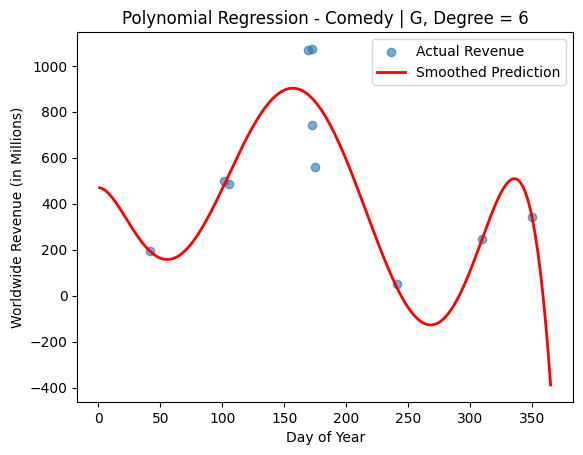

([0.8369488515830239, 17806.770570258683],
                                      Title  Year     Released  Runtime  \
 0                              Toy Story 3  2010  18 Jun 2010      103   
 196                                 Cars 2  2011  24 Jun 2011      106   
 199                                    Rio  2011  15 Apr 2011       96   
 206   Alvin and the Chipmunks: Chipwrecked  2011  16 Dec 2011       87   
 221                        Gnomeo & Juliet  2011  11 Feb 2011       84   
 298                        Winnie the Pooh  2011  29 Aug 2011       63   
 580                    Monsters University  2013  21 Jun 2013      104   
 784                                  Rio 2  2014  11 Apr 2014      101   
 994                      The Peanuts Movie  2015  06 Nov 2015       88   
 1750                           Toy Story 4  2019  21 Jun 2019      100   
 
                                Genre                       Director  \
 0     [Animation, Adventure, Comedy]                    L

In [1879]:
polynomial_regression_genre_and_rated(6, df_clean, "Comedy", "G", True, True, True)
# a perfect model, but not really because there are only 6 data points

Genre: Family, Rating: PG
Mean Squared Error (MSE): 17875.80
R-squared (R²): 0.1768


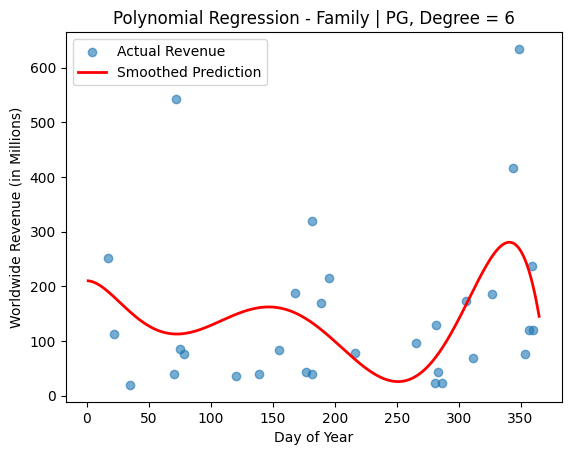

([0.17677307817761345, 17875.795714104945],
                                                   Title  Year     Released  \
 11    The Chronicles of Narnia: The Voyage of the Da...  2010  10 Dec 2010   
 17                                   The Last Airbender  2010  01 Jul 2010   
 27                                   Gulliver's Travels  2010  25 Dec 2010   
 30                            The Sorcerer's Apprentice  2010  14 Jul 2010   
 54                                          Tooth Fairy  2010  22 Jan 2010   
 68                                            Marmaduke  2010  04 Jun 2010   
 75                                 Diary of a Wimpy Kid  2010  19 Mar 2010   
 129                                     Furry Vengeance  2010  30 Apr 2010   
 222                               Mr. Popper's Penguins  2011  17 Jun 2011   
 223                                                Hugo  2011  23 Nov 2011   
 228                                           Zookeeper  2011  08 Jul 2011   
 248    

In [1880]:
polynomial_regression_genre_and_rated(6, df_clean, "Family", "PG", True, True, True)

Summary:
- Because the model using only day of year was not very accurate in predicting revenue, we decided to add the additional features of genre and MPAA rating
- We saw that this did greatly increase $R^2$ and decrease MSE.
- In the three examples above, there are two visualizations each.   
    - The first visualization shows date of release vs worldwide revenue. The smooth curve represents the predictions. This graph is a good way to visualize the polynomial nature of the line. 
    - The second visualization shows how actual revenue compares to predicted revenue. The red diagonal line represents a perfect prediction. The closer the points are to the line, the more accurate the prediction. The creation of the predictions and the red prediction line are influenced by the day of release. 

How can we interpret the graph of day of year vs worldwide revenue?

First, we need to interpret the values on the X-axis. 
- Day of the year = 0 $\,\to\,$ Date = January 1
- Day of the year = 50 $\,\to\,$ Date = February 15
- Day of the year = 100 $\,\to\,$ Date = April 10
- Day of the year = 150 $\,\to\,$ Date = May 30
- Day of the year = 200 $\,\to\,$ Date = July 19
- Day of the year = 250 $\,\to\,$ Date = September 6
- Day of the year = 300 $\,\to\,$ Date = October 27
- Day of the year = 350 $\,\to\,$ Date = December 16

The peaks on all the graphs are around day 150 and day 325. These are significant and represent the well-known movie trends of summer blockbusters and holiday season hits. Day 150 is around the beginning of the summer and day 325 is during the holiday season. 

The main valley on all the graphs is around day 250. This is another date, around the beginning of September, represents the beginning of the school year and decrease in movie attendance. 

Now we can evalute how our model performs and attempt to predict the revenue of a film based on the date of release. 

In [1881]:
metrics, df = polynomial_regression_genre_and_rated(6, df_clean, None, None, False, False, False)
residuals = df["Worldwide_millions"] - df["Revenue_prediction"]

plt.scatter(df["Revenue_prediction"], residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted")
plt.grid(True)
plt.show()

ValueError: too many values to unpack (expected 2)

Residuals < 0: 1241
Residuals > 0: 710


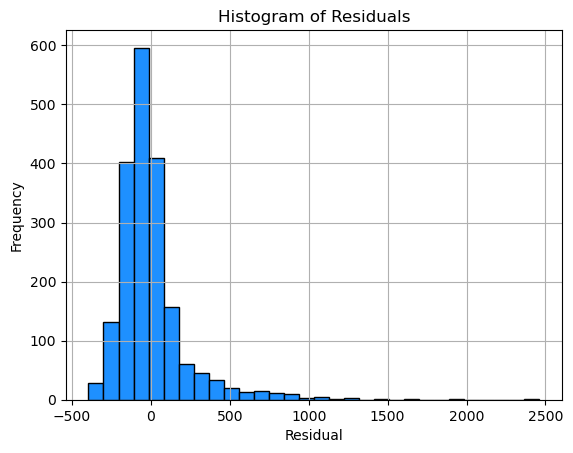

In [ ]:
less_than_zero = (residuals < 0).sum()
greater_than_zero = (residuals > 0).sum()

print(f"Residuals < 0: {less_than_zero}")
print(f"Residuals > 0: {greater_than_zero}")

plt.hist(residuals, bins=30, edgecolor='black', color = "dodgerblue")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='-', alpha=0.7)
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Index (Autocorrelation Check)")
plt.show()

In [ ]:
# Using the model to make predictions: 
# Assume we are a movie studio who is working on a family movie that is rated PG and is coming out on day 180.

def predict_new_movie(day_of_year, genre, rating, model, poly, feature_columns):
    '''
    Uses an existing model trained with genre and rating to predict worldwide revenue of a movie.

    Inputs:
        - day_of_year (int): int representing numeric day of the year
        - genre (string): represents genre of movie
        - rating (string): represents rating of movie
        - model, poly: previously trained function and polynomial features
        - feature_columns (list): included columns

    Results:
        prediction (float): predicted worldwide revenue
    '''


    # Step 1: Create new input DataFrame
    new_movie = pd.DataFrame({
        "Day_of_Year": [day_of_year],
        "Genre Random": [genre],
        "Rated": [rating]
    })

    # Step 2: One-hot encode Genre and Rated
    new_encoded = pd.get_dummies(new_movie, columns=["Genre Random", "Rated"], prefix=["Genre", "Rated"])

    # Step 3: Polynomial transform for Day_of_Year
    day_poly = poly.transform(new_movie[["Day_of_Year"]])
    day_poly_df = pd.DataFrame(day_poly, columns=[f"day_poly_{i}" for i in range(day_poly.shape[1])])

    # Step 4: Add any missing one-hot columns
    for col in feature_columns:
        if col not in day_poly_df.columns and col not in new_encoded.columns:
            new_encoded[col] = 0

    # Step 5: Combine and reindex to match feature order
    full_input = pd.concat([day_poly_df, new_encoded], axis=1)
    full_input = full_input.reindex(columns=feature_columns, fill_value=0)

    # Step 6: Predict
    prediction = model.predict(full_input)[0][0]
    return prediction


In [ ]:
# Train the model on "Family" & "PG" data
(metrics, df_out, model, poly, feature_columns) = polynomial_regression_genre_and_rated(
    degree=6,
    dataframe=df_clean,
    genre_filter="Family",
    rating_filter="PG",
    print_graph=False,
    print_values=True,
    interactive_plot=False
)

# Predict a new movie released on day 180
predicted_revenue = predict_new_movie(
    day_of_year=180,
    genre="Family",
    rating="PG",
    model=model,
    poly=poly,
    feature_columns=feature_columns
)

print(f"Predicted revenue for Family/PG movie on Day 180: ${predicted_revenue:.2f}M")

predicted_revenue = predict_new_movie(
    day_of_year=250,
    genre="Family",
    rating="PG",
    model=model,
    poly=poly,
    feature_columns=feature_columns
)

print(f"Predicted revenue for Family/PG movie on Day 250: ${predicted_revenue:.2f}M")

predicted_revenue = predict_new_movie(
    day_of_year=330,
    genre="Family",
    rating="PG",
    model=model,
    poly=poly,
    feature_columns=feature_columns
)

print(f"Predicted revenue for Family/PG movie on Day 330: ${predicted_revenue:.2f}M")

Genre: Family, Rating: PG
Mean Squared Error (MSE): 5312.95
R-squared (R²): 0.4840
Predicted revenue for Family/PG movie on Day 180: $121.66M
Predicted revenue for Family/PG movie on Day 250: $7.31M
Predicted revenue for Family/PG movie on Day 330: $194.81M


How can we interpret these results?

These results are very interesting and tell us a lot about how the time of release impacts success. In the code above, we created the model for Family movies rated PG. The movie released on day 330, around the holiday spike, had the greatest revenue. The movie released on the 180th day, around the summer blockbuster time, had the second greatest revenue. The movie released on day 250 is around the beginning of Semptember, when movie sales calm down as kids go back to school. This is represented in the low predicted worldwide revenue. 

Shortcoming of the model:

The main problem with the model is that it does not account for the year. Different years are associated with different economic states in the world. One year, the economy could be booming, leaving consumers with excess money to go to theaters. Another year, the economy could be in a recession, decreasing movie sales. By using many years of data, we tried to find the best fitting line adjusting for economic state, but even then, it is still a shortcoming of the model. 


### Polynomial Assumptions Check
- Linearity assumption is likely violated as the graph of residuals vs. predicted show a pattern indicating that the model is less accurate at higher values. Still, the values are somewhat scattered so the model could still be somewhat accurate.
- The heteroscedasticity assumption is also likely violated as the points seem to spread out slightly. This could be due to the fact that we are working with larger values. Thus, naturally leading to more variability because of the scale of the data. Another possibility for the variance are the features we choose.
- The normality check shows that our residuals are slightly skewed right, violating the normality assuption. This means that our model could potentially underpredict certain values.
- The independence assumption is violated as the Residuals vs. Index graph shows a strong systematic pattern of peaks and valleys. This implies that our model is not that reliable and that we could be missing some variables.
- Overall, the violation assumptions suggest that our model is not the best predictor of movies. This tells us that time of year may not actually be a predictor of a success of the movie and that seasonal trends do not impact revenue as much as we thought. 